In [ ]:
 ##Reading_and_visualizing_ALOS_2_images

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install rasterio matplotlib gdal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 48.1 MB/s eta 0:00:00


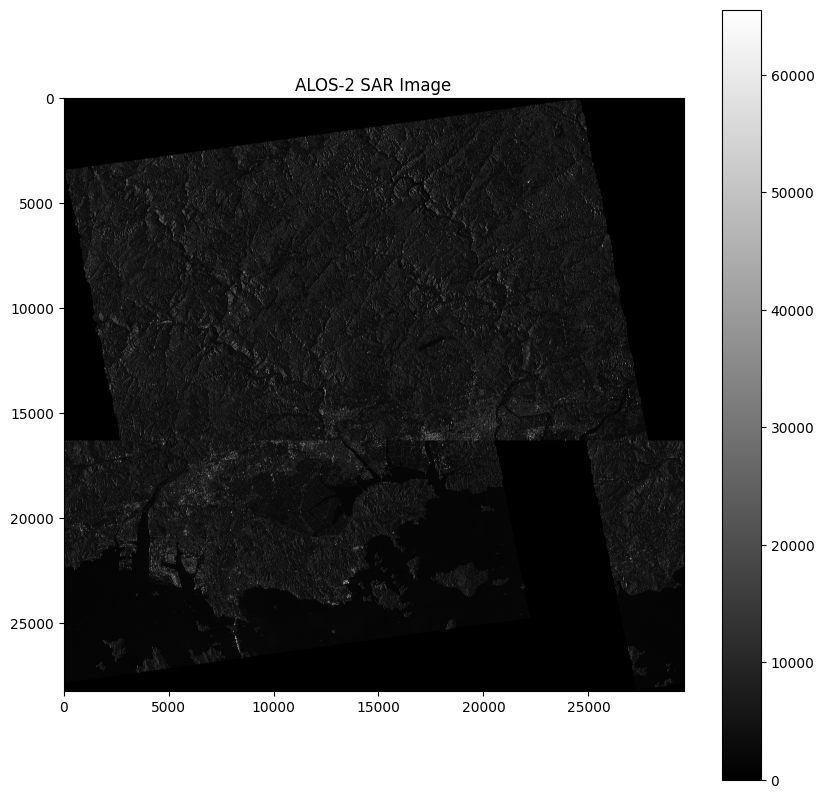

In [3]:
import rasterio
import matplotlib.pyplot as plt

# Load the ALOS-2 image
with rasterio.open('home/jovyan/shared/PCN/ALOS-2/1404_2018_clip.tif') as src:
    alos2_image = src.read(1)  # Assuming single band image or read a specific band

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(alos2_image, cmap='gray')
plt.title('ALOS-2 SAR Image')
plt.colorbar()
plt.show()


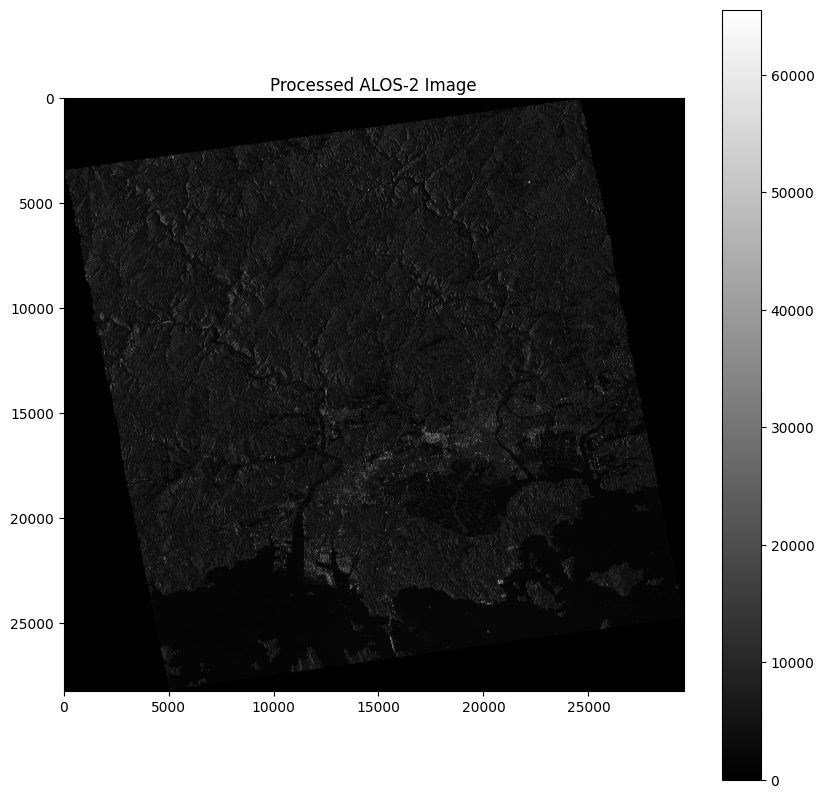

In [2]:
import rasterio
import matplotlib.pyplot as plt

# Load processed ALOS-2 image
with rasterio.open('home/jovyan/shared/PCN/ALOS-2/0707_2018_clip.tif') as src:
    alos2_image = src.read(1)  # Read the first band

# Display the processed image
plt.figure(figsize=(10, 10))
plt.imshow(alos2_image, cmap='gray')
plt.title('Processed ALOS-2 Image')
plt.colorbar()
plt.show()


In [ ]:
#Prepare the ALOS-2 Data

#Obtain ALOS-2 images for the different time periods you want to compare.
#Ensure the images are preprocessed (e.g., radiometric calibration, speckle filtering, and terrain correction) to make them comparable.

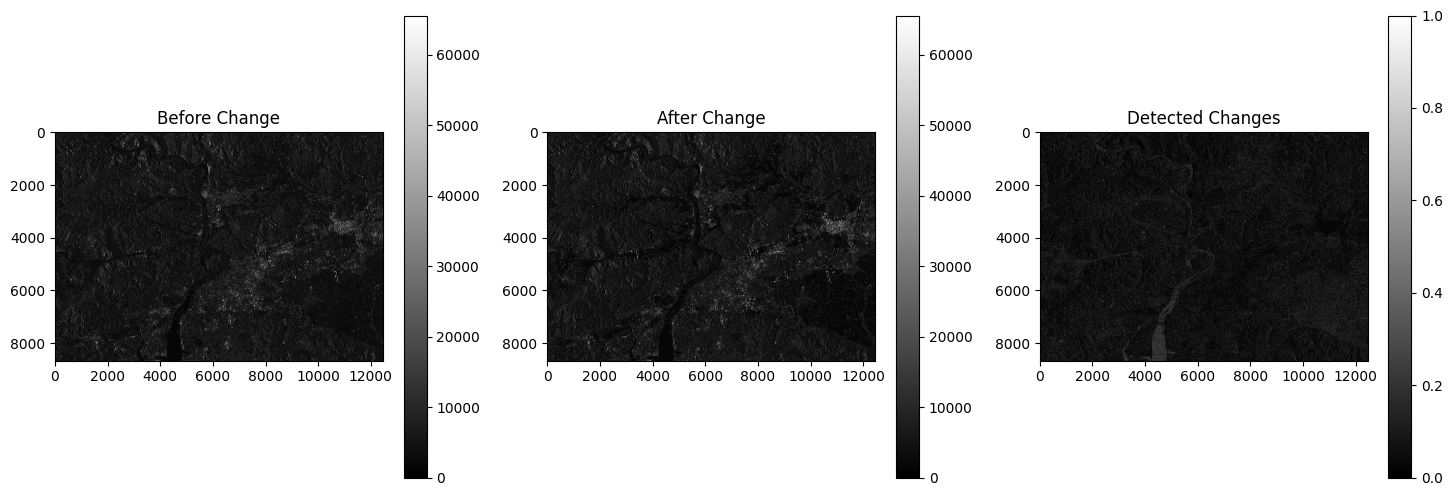

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Make sure to correctly open and read both images

# Load the first ALOS-2 image (before change)
with rasterio.open('1404_2018_clip.tif') as src_before:
    img_before = src_before.read(1)  # Read the first band

# Load the second ALOS-2 image (after change)
with rasterio.open('0707_2018_clip.tif') as src_after:
    img_after = src_after.read(1)  # Read the first band

# Calculate the difference between the two images
difference = img_after - img_before

# Apply a threshold to identify significant changes
threshold = np.mean(difference) + np.std(difference)
change_map = np.where(difference > threshold, 1, 0)

# Visualize the original images and the change detection result
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_before, cmap='gray')
plt.title('Before Change')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(img_after, cmap='gray')
plt.title('After Change')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(change_map, cmap='gray')
plt.title('Detected Changes')
plt.colorbar()

plt.show()
